In [15]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils import benchmark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import pickle
result_type = "cpu"
with open(f"../compare_{result_type}_sparseprop.pkl", "rb") as handle:
    compare = pickle.load(handle)
print(compare)

[---------- Dense Linear ----------]
                     |  Dense Linear
1 threads: -------------------------
      1024   x 2048  |    49976.2   
      512    x 2048  |    25347.0   
      256    x 2048  |    14142.5   
      128    x 2048  |     7596.4   
      64     x 2048  |     4302.5   
      32     x 2048  |     2233.1   
      16     x 2048  |     1387.4   
      8      x 2048  |      996.5   
      4      x 2048  |      806.5   
      2      x 2048  |      751.5   
      1      x 2048  |      281.5   

Times are in microseconds (us).

[---------------------------------------------------------------- Sparseprop ---------------------------------------------------------------]
                     |  Sparseprop @ sparsity 0.5  |  Sparseprop @ sparsity 0.9  |  Sparseprop @ sparsity 0.95  |  Sparseprop @ sparsity 0.99
1 threads: ----------------------------------------------------------------------------------------------------------------------------------
      1024   x 2048  |

In [17]:
type(compare)

torch.utils.benchmark.utils.compare.Compare

In [18]:
for measurement in compare._results:
    print(measurement)
    print(measurement.__dict__.keys())
    print(measurement.__dict__['task_spec'].__dict__.keys())
    print(measurement.__dict__['task_spec'].__dict__["description"])

    break

Dense Linear: 1024   x 2048
Dense Linear
  Median: 49.98 ms
  IQR:    1.28 ms (49.26 to 50.55)
  11 measurements, 10 runs per measurement, 1 thread
dict_keys(['number_per_run', 'raw_times', 'task_spec', 'metadata', '_sorted_times', '_warnings', '_median', '_mean', '_p25', '_p75'])
dict_keys(['stmt', 'setup', 'global_setup', 'label', 'sub_label', 'description', 'env', 'num_threads'])
Dense Linear


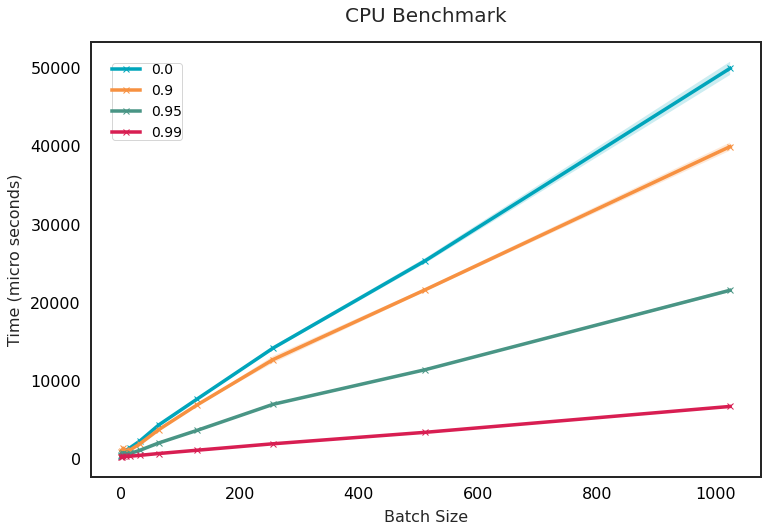

In [27]:
import re
import pandas as pd
import numpy as np
plt.style.use("../plt_plot_style.mplstyle")
data = {
    "sparsity": [],
    "batch_size": [],
    "num_features": [],
    "time": [],
    "std": []
}
for measurement in compare._results:
    desc = measurement.description
    sparsity = desc[-3:]
    if sparsity == "0.5":
        continue
    if desc == "Dense Linear":
        data["sparsity"].append(0.0)
    else:
        data["sparsity"].append(float(desc[-3:]))
    batch, num_features = re.findall(r"[0-9]+", measurement.sub_label)
    data["batch_size"].append(int(batch))
    data["num_features"].append(int(num_features))
    data["time"].append(measurement.median*1e6)
    data["std"].append(np.std(measurement.times)*1e6)
df = pd.DataFrame(data)
df = df.sort_values(by=["batch_size", "sparsity"], ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
# df = df.loc[df["batch_size"]<=256]
for s in df["sparsity"].unique():
    df_slice = df.loc[df["sparsity"] == s]
    # df_slice = df_slice.groupby("batch_size").agg(mean_time=("time", "mean"), std_time=("time", "std")).reset_index()
    ax.plot(df_slice["batch_size"], df_slice["time"], label=s, marker="x")
    ax.fill_between(
        df_slice["batch_size"],
        df_slice["time"]+df_slice["std"],
        df_slice["time"]-df_slice["std"],
        alpha=0.2
    )
plt.legend()
plt.ylabel("Time (micro seconds)")
plt.xlabel("Batch Size")
plt.title(f"{result_type.upper()} Benchmark")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()
fig.savefig(f"{result_type}_benchmark_sparseprop.png", dpi=400, transparent=False)
fig.savefig(f"{result_type}_benchmark_sparseprop.svg", dpi=400, transparent=False)


In [28]:
df

,sparsity,batch_size,num_features,time,std
40,0.00,1,2048,281.458404,2.635307
41,0.90,1,2048,889.219437,5.659898
42,0.95,1,2048,499.508776,5.470108
43,0.99,1,2048,184.336567,2.511363
36,0.00,2,2048,751.491999,5.358514
37,0.90,2,2048,945.192090,4.304563
38,0.95,2,2048,555.044780,3.510666
39,0.99,2,2048,243.726999,2.610876
32,0.00,4,2048,806.499368,3.255132
33,0.90,4,2048,1312.274570,18.261224


In [37]:
measurement

Sparseprop: 1      x 2048
Sparseprop @ sparsity 0.99
  Median: 184.34 us
  IQR:    3.52 us (182.44 to 185.96)
  28 measurements, 1000 runs per measurement, 1 thread

In [36]:
df_latex = df[["batch_size", "sparsity", "time"]]
df_latex = df_latex.pivot(index="batch_size", columns=["sparsity"])
df_latex.round(2)

time                             
sparsity        0.00      0.90      0.95     0.99
batch_size                                       
1             281.46    889.22    499.51   184.34
2             751.49    945.19    555.04   243.73
4             806.50   1312.27    745.06   296.65
8             996.54   1025.11    603.21   264.19
16           1387.37   1105.69    641.80   288.01
32           2233.10   1870.84   1042.27   400.05
64           4302.49   3699.99   1991.97   633.24
128          7596.41   6845.54   3592.11  1052.23
256         14142.45  12668.60   6937.64  1880.93
512         25347.01  21626.07  11376.19  3349.41
1024        49976.19  39949.67  21543.18  6663.98

In [3]:
## Full model results

import pickle
result_type = "cpu"
with open(f"../compare_{result_type}_sparseprop_resnet50.pkl", "rb") as handle:
    compare = pickle.load(handle)
print(compare)

[---------------------------------------------------------------------------------------------------------------- Sparse ResNet50 with const_fan==True ---------------------------------------------------------------------------------------------------------------]
                                       |  Sparse ResNet50 @ sparsity 0.5 with const_fan==True  |  Sparse ResNet50 @ sparsity 0.9 with const_fan==True  |  Sparse ResNet50 @ sparsity 0.95 with const_fan==True  |  Sparse ResNet50 @ sparsity 0.99 with const_fan==True
1 threads: ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      torch.Size([1024, 3, 224, 224])  |                        265328.4                       |                        263130.2                       |                        262220.3                        

In [5]:
compare._results[0]

Sparse ResNet50 with const_fan==True: torch.Size([1024, 3, 224, 224])
Sparse ResNet50 @ sparsity 0.5 with const_fan==True
  265.33 s
  1 measurement, 1 runs , 1 thread

In [6]:
compare._results[0].median

265.3284470359795

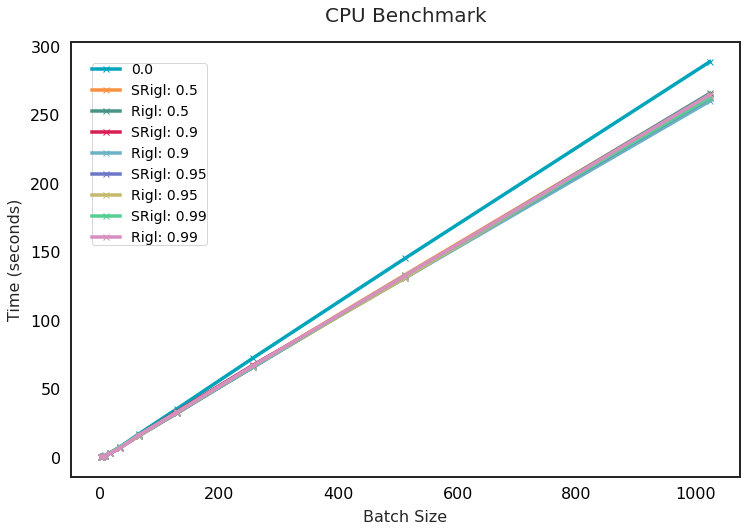

In [12]:
plt.style.use("../plt_plot_style.mplstyle")
data = {
    "sparsity": [],
    "batch_size": [],
    "time": [],
    "std": [],
    "const_fan": []
}
for measurement in compare._results:
    desc = measurement.description
    if desc.split(" ")[0] == "Partially":
        continue
    match_obj = re.search(r"0\.\d*", desc)
    if match_obj is None:
        sparsity=0.0
        const_fan_in = "N/A"
    else:
        sparsity = float(match_obj.group())
        const_fan_in = desc.split("==")[1]
    data["sparsity"].append(sparsity)
    batch_size, *features = re.findall(r"[0-9]+", measurement.sub_label)
    data["batch_size"].append(int(batch_size))
    data["time"].append(measurement.median)
    data["std"].append(np.std(measurement.times))
    data["const_fan"].append(const_fan_in)
df = pd.DataFrame(data)
df = df.sort_values(by=["batch_size", "sparsity"], ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
# df = df.loc[df["batch_size"]<=256]
for s in df["sparsity"].unique():
    df_slice = df.loc[df["sparsity"] == s]
    series_to_plot = []
    labels = []
    if s != 0.0:
        df_slice_const = df_slice.loc[df["const_fan"] == "True"]
        df_slice_non_const = df_slice.loc[df["const_fan"] == "False"]
        series_to_plot.append(df_slice_const)
        series_to_plot.append(df_slice_non_const)
        labels.append(f"SRigl: {s}")
        labels.append(f"Rigl: {s}")
    else:
        series_to_plot.append(df_slice)
        labels.append(s)
    for label, series in list(zip(labels, series_to_plot)):
        ax.plot(series["batch_size"], series["time"], label=label, marker="x")
        ax.fill_between(
            series["batch_size"],
            series["time"]+series["std"],
            series["time"]-series["std"],
            alpha=0.2
        )
plt.legend()
plt.ylabel("Time (seconds)")
plt.xlabel("Batch Size")
plt.title(f"{result_type.upper()} Benchmark")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()
# fig.savefig(f"{result_type}_benchmark_sparseprop.png", dpi=400, transparent=False)
# fig.savefig(f"{result_type}_benchmark_sparseprop.svg", dpi=400, transparent=False)
